In [2]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.patches as patches
import math
import numpy as np

In [41]:
class World:
    def __init__(self,time_span,time_interval,debug=False):
        self.time_span=time_span
        self.time_interval=time_interval
        self.debug=debug
        self.objects=[]
    
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig=plt.figure(figsize=(3,3))
        ax=fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems=[]
        
        if self.debug:
            for frame in range(3): self.one_step(frame,ax,elems)
        else:
            self.ani=anm.FuncAnimation(fig=fig,func=self.one_step,frames=int(self.time_span/self.time_interval),fargs=(ax,elems),interval=int(self.time_interval*1000),repeat=False)
            self.ani.save("proto_type_no1.gif", writer = 'Pillow')
            plt.show()
    
    def one_step(self,time,ax,elems):
        while elems: elems.pop().remove()
        second="time= %.2f[s]"%(time*self.time_interval)
        elems.append(ax.text(-4.5,4.5,str(second),fontsize=10))
        for obj in self.objects:
            obj.draw(ax,elems)
            if hasattr(obj,"one_step"):obj.one_step(self.time_interval)

In [42]:
class IdealRobot:
    def __init__(self,pose,color="black",agent=None,sensor=None):
        self.pose=pose
        self.r=0.5
        self.color=color
        self.agent=agent
        self.sensor=sensor
        self.poses=[pose]
    
    def draw(self,ax,elems):
        x,y,theta=self.pose
        self.poses.append(self.pose)
        xn=x+self.r*math.cos(theta)
        yn=y+self.r*math.sin(theta)
        elems+=ax.plot([x,xn],[y,yn],color=self.color)
        c=patches.Circle(xy=(x,y),radius=self.r,color="black",fill=False)
        elems.append(ax.add_patch(c))
    
    @classmethod
    def state_transition(cls,nu,omega,time,pose):
        t0=pose[2]
        if math.fabs(omega)<1e-10:
            return pose+np.array([nu*math.cos(t0),
                                   nu*math.sin(t0),
                                   omega
                                   ])*time
        else:
            return pose+np.array([nu/omega*(math.sin(t0+omega*time)-math.sin(t0)),
                                   nu/omega*(-math.cos(t0+omega*time)+math.cos(t0)),
                                   omega*time])
        
    def one_step(self,time):
        nu,omega=self.agent.decision()
        self.pose=self.state_transition(nu,omega,time,self.pose)

In [43]:
class Agent:
    def __init__(self,nu,omega):
        self.nu=nu
        self.omega=omega
    
    def decision(self,obs=None):
        return self.nu,self.omega

In [44]:
class Landmark:
    def __init__(self,pos,id=None):
        self.pos=pos
        self.id=id
    
    def draw(self,ax,elems):
        elems.append(ax.scatter(self.pos[0],self.pos[1],s=100,marker="|",color="orange"))
        #elems.append(ax.text(self.pos[0],self.pos[1],"id:"+str(self.id),fontsize=10))

MovieWriter Pillow unavailable; using Pillow instead.


<IPython.core.display.Javascript object>


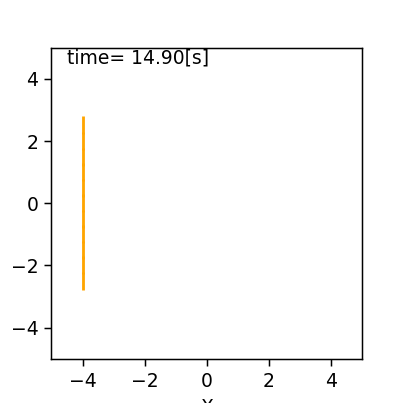

In [46]:
world=World(15,0.1,debug=False)

lm1=Landmark(np.array([-4,-2.5]),0)
lm2=Landmark(np.array([-4,-2]),1)
lm3=Landmark(np.array([-4,-1.5]),2)
lm4=Landmark(np.array([-4,-1.0]),3)
lm5=Landmark(np.array([-4,-0.5]),3)
lm6=Landmark(np.array([-4,0]),0)
lm7=Landmark(np.array([-4,0.5]),1)
lm8=Landmark(np.array([-4,1.0]),2)
lm9=Landmark(np.array([-4,1.5]),3)
lm10=Landmark(np.array([-4,2.0]),3)
lm11=Landmark(np.array([-4,2.5]),3)
world.append(lm1)
world.append(lm2)
world.append(lm3)
world.append(lm4)
world.append(lm5)
world.append(lm6)
world.append(lm7)
world.append(lm8)
world.append(lm9)
world.append(lm10)
world.append(lm11)
circle=Agent(0.5,0)
robot1=IdealRobot(np.array([3,0,math.pi]).T,agent=circle)
world.append(robot1)

world.draw()